# Reproducing the Main Findings of the ProPublica Study

**Data:** https://github.com/propublica/compas-analysis  
**Article:** https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm  
**Story:** https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing

Summary of findings: This landmark study by ProPublica of Northpointe, Inc.'s tool for predicting criminal risk scores and criminal recidivism, the Correctional Offender Management Profiling for Alternative Sanctions (COMPAS), found that Black defendants were nearly twice as likely as white defendants to be misclassified as higher risk, while white defendants were about 1.7 times more likely than Black defendants to be misclassified as low risk. Below, I reproduce some of the main findings of the study, including the racial disparities in decile score distribution for both non-violent and violent crimes, and the false positive, false negative, true positive, and true negative rates of non-violent recidivism prediction for Black and white defendants.

### References/Useful Links:
Pandas Documentation: https://pandas.pydata.org/docs/  
MatPlotLib Documentation: https://matplotlib.org/stable/contents.html  
NumPy Documentation: https://numpy.org/doc/  
Seaborn Documentation: https://seaborn.pydata.org/  
Statsmodels LR (Logit) Documentation: https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.html  
Statsmodels Lin Reg (OLS) Documentation: https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html  

### Other sources for small tips & tricks (changing font sizes, rotating axes, documentation examples, etc.):
GeeksforGeeks: https://www.geeksforgeeks.org/  
W3Schools: https://www.w3schools.com/  
Python Docs: https://docs.python.org/3/

In [474]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [604]:
# compas_path = 'compas-scores-two-years.csv'
url = 'https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv'
compas_df = pd.read_csv(url)

In [605]:
compas_df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [412]:
# color palettes
pastels=sns.color_palette('pastel')
display(pastels)

muted=sns.color_palette('muted')
display(muted)

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

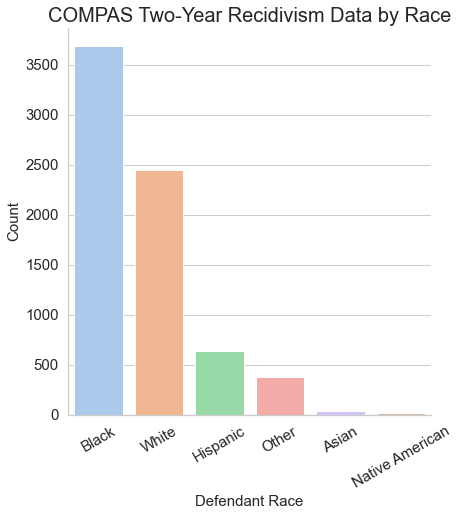

In [530]:
sns.set_theme(style="whitegrid")
race_counts_bar = sns.catplot(x="race", kind="count", palette="pastel", 
                              order=['African-American', 'Caucasian', 'Hispanic', 'Other', 'Asian', 'Native American'], 
                              data=compas_df, 
                              height=6, aspect=1)
plt.xticks(rotation=30)
race_counts_bar.ax.set_xticklabels(['Black', 'White', 'Hispanic', 'Other', 'Asian', 'Native American'])
race_counts_bar.ax.set_ylabel('Count', fontsize='15')
race_counts_bar.ax.set_xlabel('Defendant Race', fontsize='15')
race_counts_bar.ax.tick_params(axis='x', labelsize='15')
race_counts_bar.ax.tick_params(axis='y', labelsize='15')
race_counts_bar.ax.set_title('COMPAS Two-Year Recidivism Data by Race', fontsize='20');

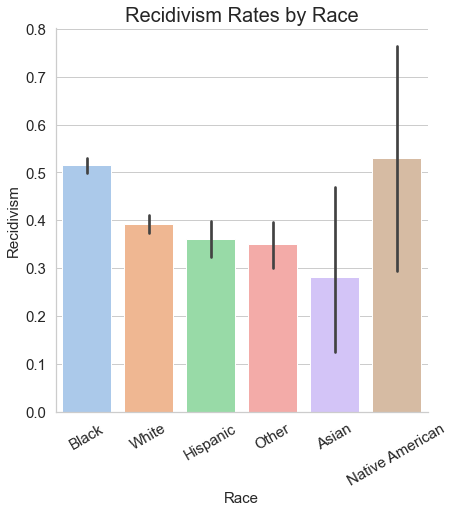

In [529]:
sns.set_theme(style="whitegrid")
catp = sns.catplot(x="race", y="two_year_recid", palette='pastel', 
            order=['African-American', 'Caucasian', 'Hispanic', 'Other', 'Asian', 'Native American'], 
            kind="bar", data=compas_df,
            height=6, aspect=1)

plt.xticks(rotation=30)
catp.ax.set_xticklabels(['Black', 'White', 'Hispanic', 'Other', 'Asian', 'Native American'])
catp.ax.set_ylabel('Recidivism', fontsize='15')
catp.ax.set_xlabel('Race', fontsize='15')
catp.ax.tick_params(axis='x', labelsize='15')
catp.ax.tick_params(axis='y', labelsize='15')
catp.ax.set_title('Recidivism Rates by Race', fontsize='20');

In [415]:
recid_rate = []
races = ['African-American', 'Caucasian', 'Hispanic', 'Other', 'Asian', 'Native American']
for race in races:
    compas_df_race = compas_df[compas_df['race'] == race]
    recid_rate.append(len(compas_df_race[compas_df_race['two_year_recid'] == 1])/len(compas_df_race))

d = {'Race': races, 'Recidvism Rate': recid_rate}
recid_rates_df = pd.DataFrame(data=d)
recid_rates_df

,Race,Recidvism Rate
0,African-American,0.514340
1,Caucasian,0.393643
2,Hispanic,0.364207
3,Other,0.352785
4,Asian,0.281250
5,Native American,0.555556


In [416]:
compas_df_schema = pd.DataFrame(compas_df.dtypes)
#compas_df_schema.to_csv('compas_df_schema')

In [417]:
# plot distr of decile scores for black and white offenders
# we observe no true trend for black offenders, but a steady downward trend for white offenders 
# (this means that more white offenders are scored lower than higher)
all_decile = compas_df['decile_score']
b_decile = compas_df[compas_df['race'] == 'African-American']['decile_score']
w_decile = compas_df[compas_df['race'] == 'Caucasian']['decile_score']
h_decile = compas_df[compas_df['race'] == 'Hispanic']['decile_score']
o_decile = compas_df[compas_df['race'] == 'Other']['decile_score']
a_decile = compas_df[compas_df['race'] == 'Asian']['decile_score']
n_decile = compas_df[compas_df['race'] == 'Native American']['decile_score']
print(all_decile.mean())
print(w_decile.mean())
print(b_decile.mean())
print(h_decile.mean())
print(o_decile.mean())
print(a_decile.mean())
print(n_decile.mean())

4.509564735237039
3.735126324368378
5.3687770562770565
3.463108320251177
2.949602122015915
2.9375
6.166666666666667


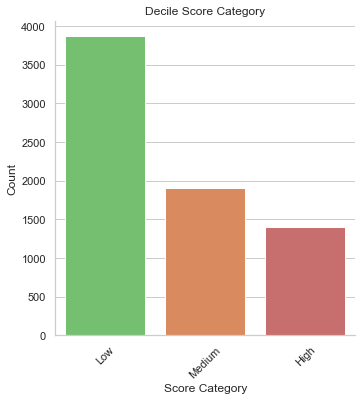

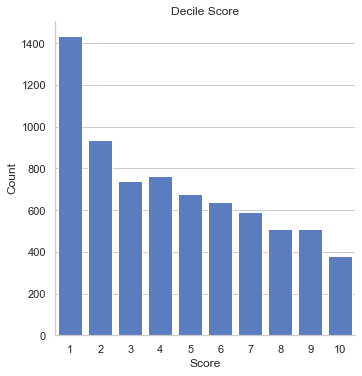

In [520]:
sns.set_theme(style="whitegrid")
sns.catplot(x="score_text", kind="count", palette=[muted[2], muted[1], muted[3]], order=['Low', 'Medium', 'High'], data=compas_df)
plt.xticks(rotation=45)
plt.xlabel('Score Category')
plt.ylabel('Count')
plt.title('Decile Score Category');
plt.show()

decile_bar = sns.catplot(x='decile_score', kind="count", color=muted[0], data=compas_df,
            height=5, aspect=1)
plt.title('Decile Score')
plt.ylabel('Count')
plt.xlabel('Score')
plt.show()

[Text(0, 0, 'Other'), Text(0, 0, 'Black'), Text(0, 0, 'White'), Text(0, 0, 'Hispanic'), Text(0, 0, 'Native American'), Text(0, 0, 'Asian')]


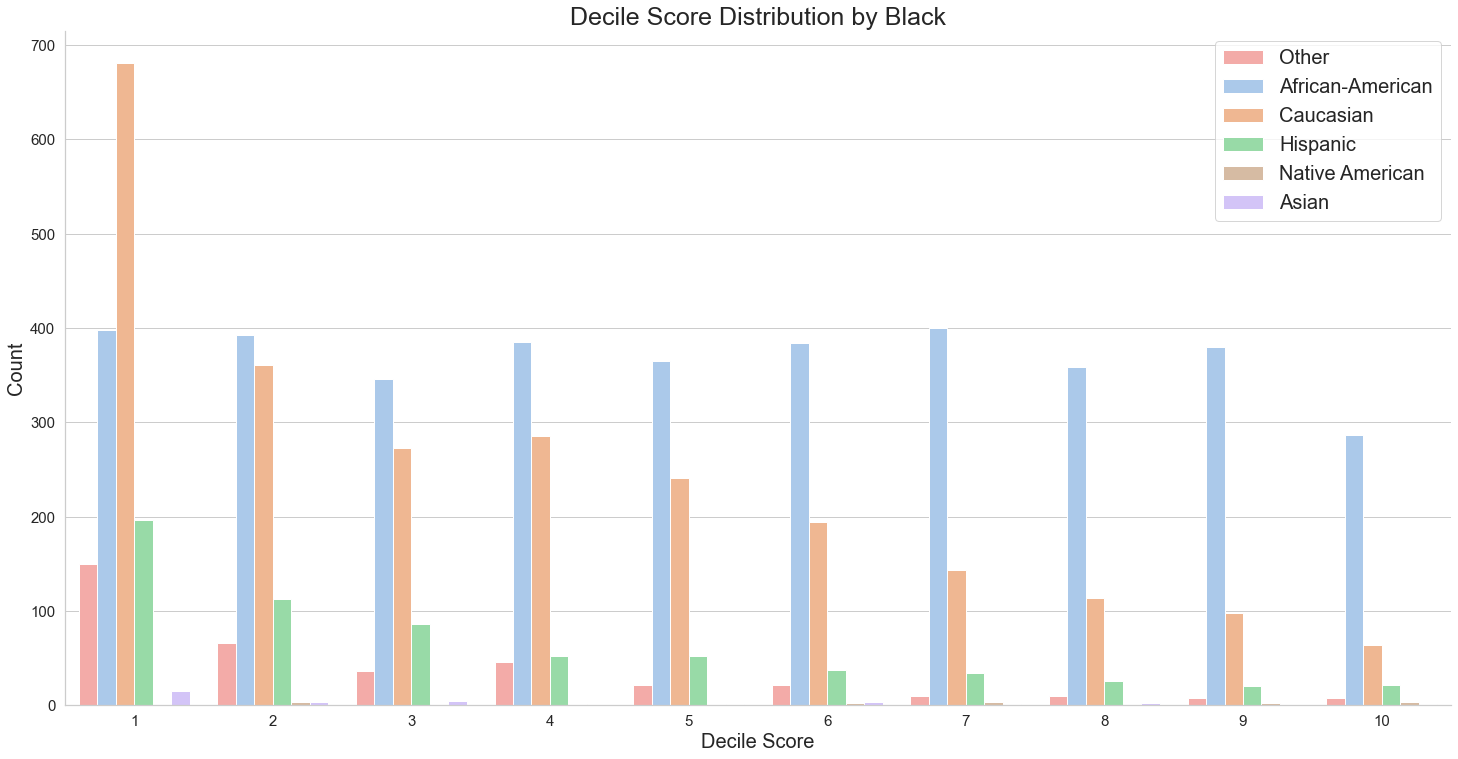

In [612]:
pastels_reordered = [pastels[3], pastels[0], pastels[1], pastels[2], pastels[5], pastels[4]]

decile_bar = sns.catplot(x='decile_score', kind="count", hue='race', palette=pastels_reordered, data=compas_df,
            height=10, aspect=2, legend_out=False)
decile_bar.ax.set_title('Decile Score Distribution by Black', fontsize='25')
decile_bar.ax.set_xlabel('Decile Score', fontsize='20')
decile_bar.ax.set_ylabel('Count', fontsize='20')
decile_bar.ax.tick_params(axis='x', labelsize='15')
decile_bar.ax.tick_params(axis='y', labelsize='15')
decile_bar._legend.set_title('Race')
decile_bar.ax.legend(fontsize='20')
new_labels = ['Other', 'Black', 'White', 'Hispanic', 'Native American', 'Asian']
for t, l in zip(decile_bar._legend.texts, new_labels): t.set_text(l)
print(decile_bar.legend.texts)

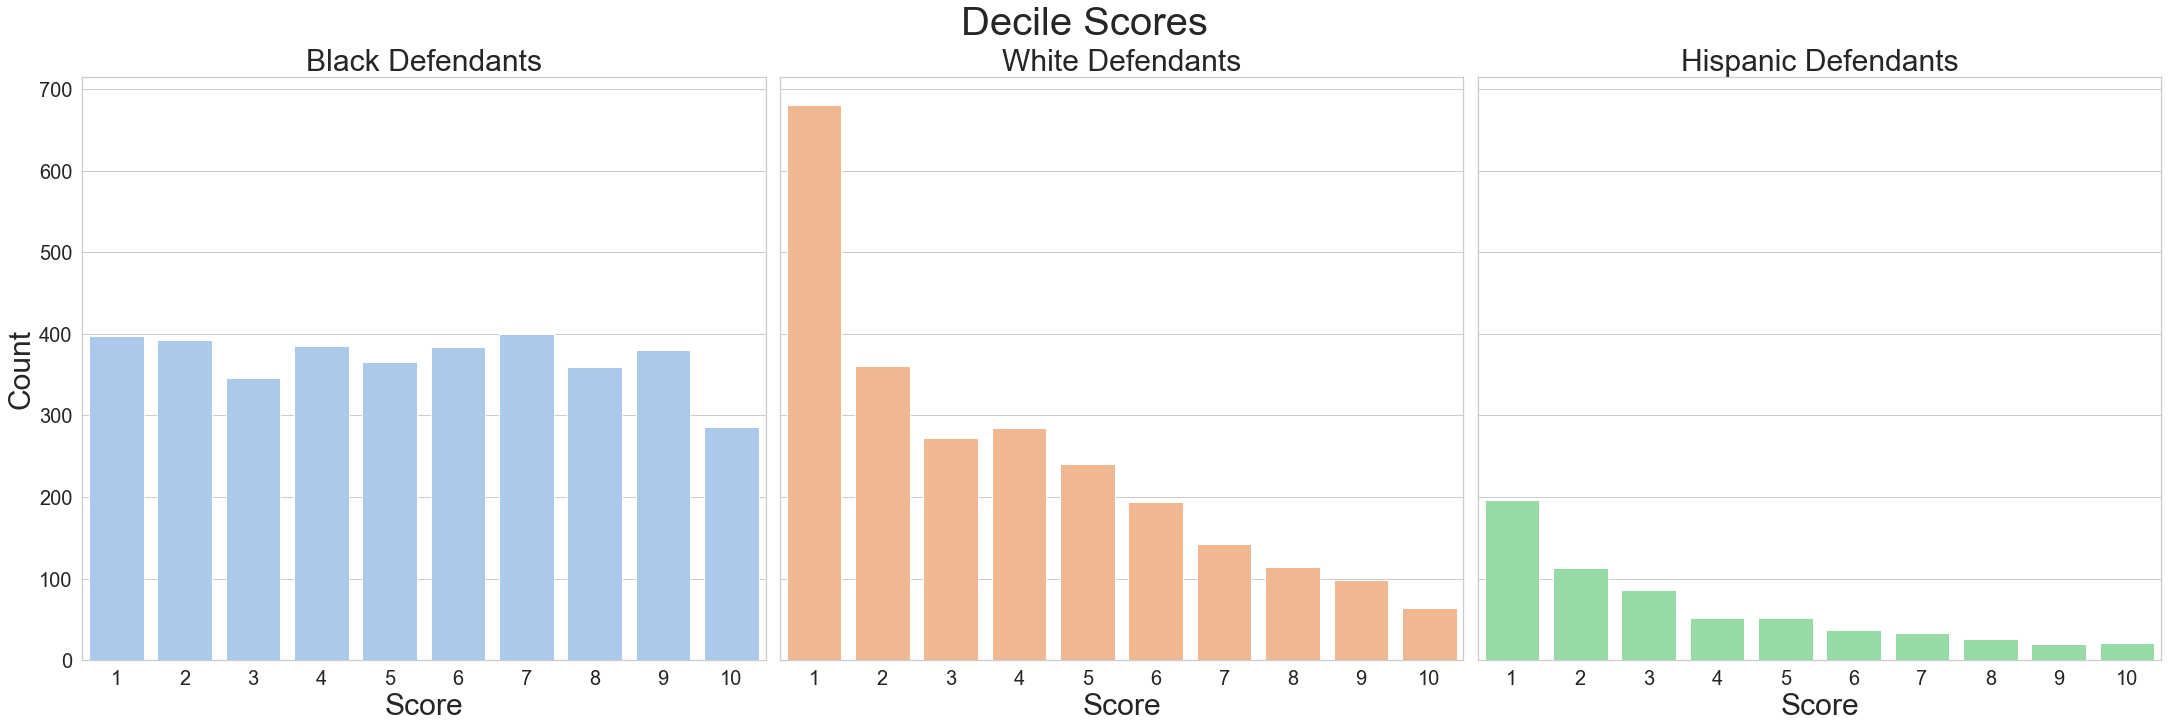

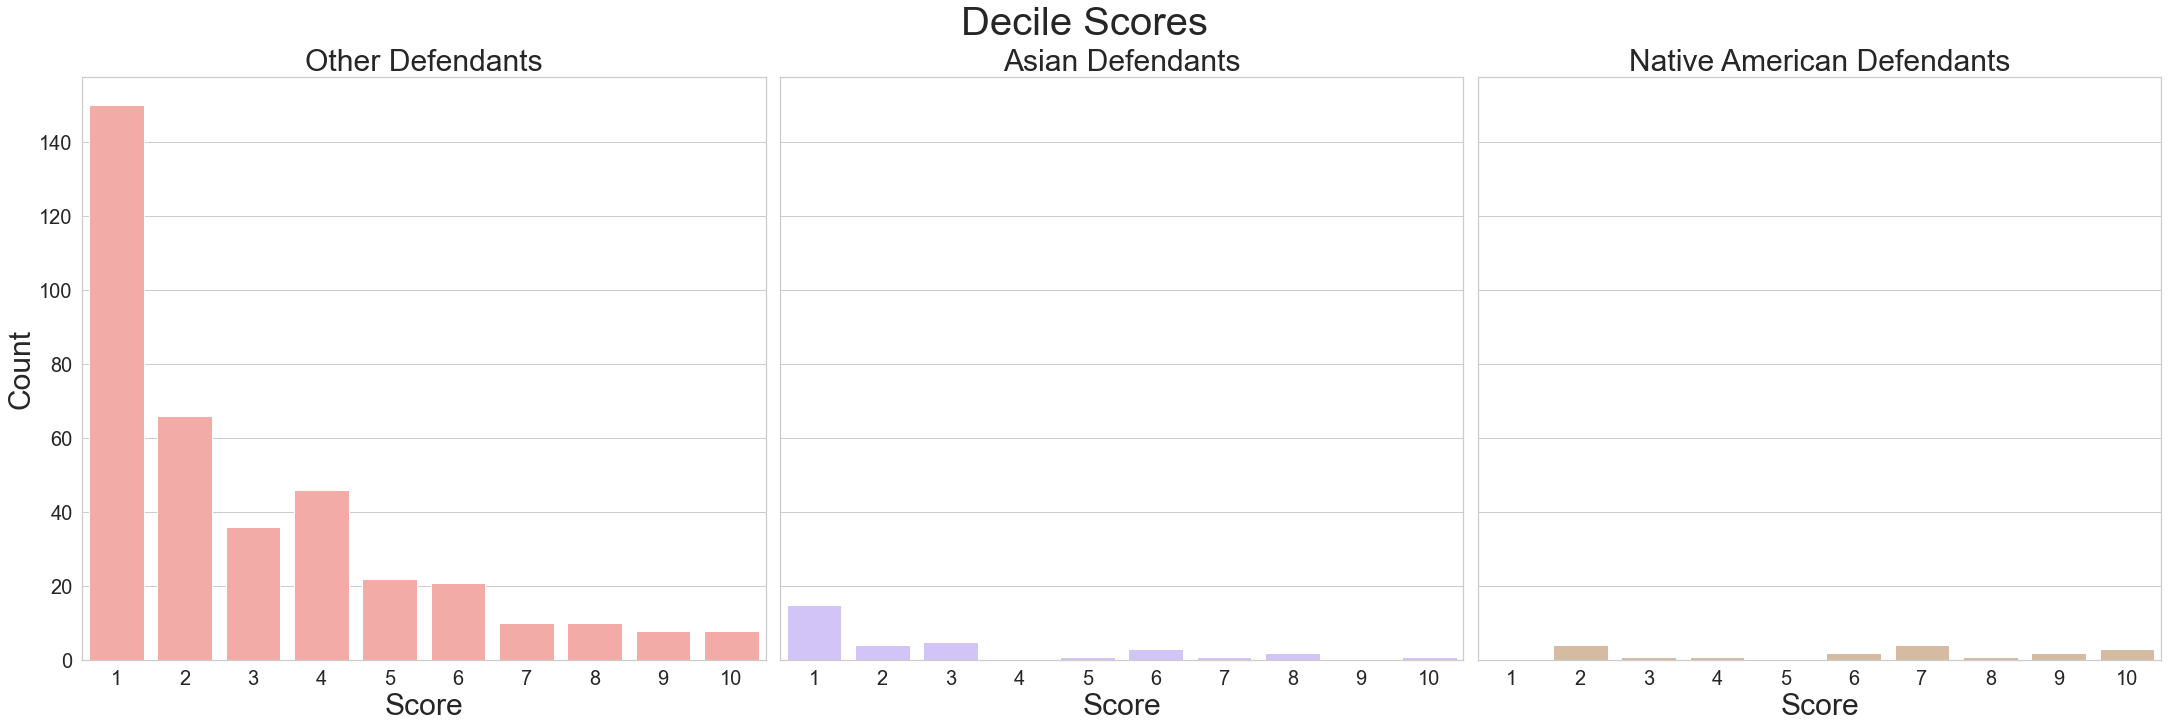

In [419]:
# plot distribution of decile scores for Black and white defendants

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(30, 10), constrained_layout=True)
fig.suptitle('Decile Scores', fontsize='40')

b_decile_dic = {i:b_decile.tolist().count(i) for i in np.arange(1, 11)}
sns.barplot(ax=ax1, x=list(b_decile_dic.keys()), y=list(b_decile_dic.values()), color=pastels[0])
ax1.set_title('Black Defendants', fontsize='30')
ax1.set_ylabel('Count', fontsize='30')
ax1.set_xlabel('Score', fontsize='30')
ax1.tick_params(axis='x', labelsize='20')
ax1.tick_params(axis='y', labelsize='20')

w_decile_dic = {i:w_decile.tolist().count(i) for i in np.arange(1, 11)}
sns.barplot(ax=ax2, x=list(w_decile_dic.keys()), y=list(w_decile_dic.values()), color=pastels[1])
ax2.set_title('White Defendants', fontsize='30')
ax2.set_xlabel('Score', fontsize='30')
ax2.tick_params(axis='x', labelsize='20')

h_decile_dic = {i:h_decile.tolist().count(i) for i in np.arange(1, 11)}
sns.barplot(ax=ax3, x=list(h_decile_dic.keys()), y=list(h_decile_dic.values()), color=pastels[2])
ax3.set_title('Hispanic Defendants', fontsize='30')
ax3.set_xlabel('Score', fontsize='30')
ax3.tick_params(axis='x', labelsize='20')


fig2, (ax4, ax5, ax6) = plt.subplots(1,3, sharey=True, figsize=(30, 10), constrained_layout=True)
fig2.suptitle('Decile Scores', fontsize='40')
o_decile_dic = {i:o_decile.tolist().count(i) for i in np.arange(1, 11)}
sns.barplot(ax=ax4, x=list(o_decile_dic.keys()), y=list(o_decile_dic.values()), color=pastels[3])
ax4.set_title('Other Defendants', fontsize='30')
ax4.set_ylabel('Count', fontsize='30')
ax4.set_xlabel('Score', fontsize='30')
ax4.tick_params(axis='x', labelsize='20')
ax4.tick_params(axis='y', labelsize='20')

a_decile_dic = {i:a_decile.tolist().count(i) for i in np.arange(1, 11)}
sns.barplot(ax=ax5, x=list(a_decile_dic.keys()), y=list(a_decile_dic.values()), color=pastels[4])
ax5.set_title('Asian Defendants', fontsize='30')
ax5.set_xlabel('Score', fontsize='30')
ax5.tick_params(axis='x', labelsize='20')

n_decile_dic = {i:n_decile.tolist().count(i) for i in np.arange(1, 11)}
sns.barplot(ax=ax6, x=list(n_decile_dic.keys()), y=list(n_decile_dic.values()), color=pastels[5])
ax6.set_title('Native American Defendants', fontsize='30')
ax6.set_xlabel('Score', fontsize='30')
ax6.tick_params(axis='x', labelsize='20')

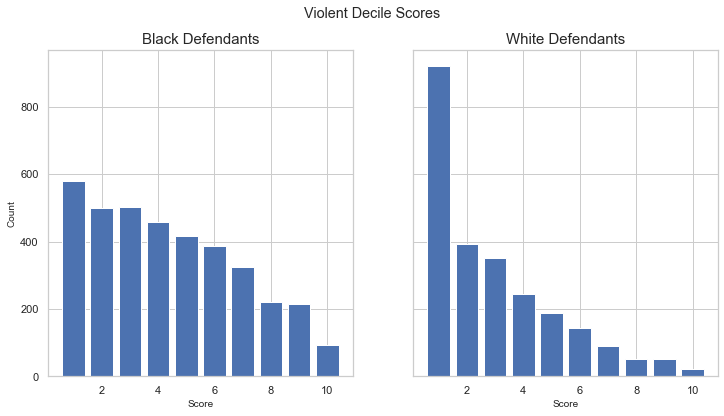

In [420]:
# repeat for violent decile scores

b_v_decile = compas_df[compas_df['race'] == 'African-American']['v_decile_score']
w_v_decile = compas_df[compas_df['race'] == 'Caucasian']['v_decile_score']

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(12, 6))
fig.suptitle('Violent Decile Scores')
b_v_decile_dic = {i:b_v_decile.tolist().count(i) for i in np.arange(1, 11)}
ax1.bar(b_v_decile_dic.keys(), b_v_decile_dic.values())
ax1.set_title('Black Defendants')
ax1.set_ylabel('Count')
ax1.set_xlabel('Score')
w_v_decile_dic = {i:w_v_decile.tolist().count(i) for i in np.arange(1, 11)}
ax2.bar(w_v_decile_dic.keys(), w_v_decile_dic.values())
ax2.set_title('White Defendants')
ax2.set_xlabel('Score');

In [598]:
# compare misclassification rates (FP, FN, PPV, NPV) for non-violent recidivism
def cont_tbl_counts(threshold):
    rows = compas_df.shape[0]
    b_low_nr, b_high_nr, b_low_r, b_high_r = 0, 0, 0, 0
    w_low_nr, w_high_nr, w_low_r, w_high_r = 0, 0, 0, 0
    low_nr, high_nr, low_r, high_r = 0, 0, 0, 0

    for i in range(rows):
        score = compas_df.iloc[i]['decile_score']
        is_recid = compas_df.iloc[i]['two_year_recid']
        if compas_df.iloc[i]['race'] == 'African-American':
            if score >= threshold:
                if is_recid: b_high_r += 1
                else: b_high_nr += 1
            else:
                if is_recid: b_low_r += 1
                else: b_low_nr += 1
        elif compas_df.iloc[i]['race'] == 'Caucasian':
            if score >= threshold:
                if is_recid: w_high_r += 1
                else: w_high_nr += 1
            else:
                if is_recid: w_low_r += 1
                else: w_low_nr += 1
        else:
            if score >= threshold:
                if is_recid: high_r += 1
                else: high_nr += 1
            else:
                if is_recid: low_r += 1
                else: low_nr += 1

    low_nr += (b_low_nr + w_low_nr)
    high_nr += (b_high_nr + w_high_nr)
    low_r += (b_low_r + w_low_r)
    high_r += (b_high_r + w_high_r)
    
    return b_low_nr, b_high_nr, b_low_r, b_high_r, w_low_nr, w_high_nr, w_low_r, w_high_r, low_nr, high_nr, low_r, high_r

In [599]:
def get_cont_stats(b_low_nr, b_high_nr, b_low_r, b_high_r, w_low_nr, w_high_nr, w_low_r, w_high_r, low_nr, high_nr, low_r, high_r):
    # compute false positive rates
    b_fp = b_high_nr / (b_high_nr + b_low_nr)
    w_fp = w_high_nr / (w_high_nr + w_low_nr)

    # compute false negative rates
    b_fn = b_low_r / (b_low_r + b_high_r)
    w_fn = w_low_r / (w_low_r + w_high_r)

    # compute target pop stats
    # scored low, but did recidivate
    b_tps = b_low_r / (b_low_nr + b_low_r)
    w_tps = w_low_r / (w_low_nr + w_low_r)
    # scored high, but did not recidivate 
    b_tps2 = b_high_nr / (b_high_nr + b_high_r)
    w_tps2 = w_high_nr / (w_high_nr + w_high_r)

    # compute pv+
    b_ppv = b_high_r / (b_high_r + b_high_nr)
    w_ppv = w_high_r / (w_high_r + w_high_nr)

    # compute pv-
    b_npv = b_low_nr / (b_low_r + b_low_nr)
    w_npv = w_low_nr / (w_low_r + w_low_nr)

    # compute overall recid rates
    b_recid = (b_high_r + b_low_r) / (b_high_r + b_high_nr + b_low_nr + b_low_r)
    w_recid = (w_high_r + w_low_r) / (w_high_r + w_high_nr + w_low_nr + w_low_r)
    
    return b_fp, w_fp, b_fn, w_fn, b_tps, w_tps, b_tps2, w_tps2, b_ppv, w_ppv, b_npv, w_npv, b_recid, w_recid

In [600]:
def make_tables(threshold):
    
    b_low_nr, b_high_nr, b_low_r, b_high_r, w_low_nr, w_high_nr, w_low_r, w_high_r, low_nr, high_nr, low_r, high_r = cont_tbl_counts(threshold)
    b_fp, w_fp, b_fn, w_fn, b_tps, w_tps, b_tps2, w_tps2, b_ppv, w_ppv, b_npv, w_npv, b_recid, w_recid = get_cont_stats(b_low_nr, b_high_nr, b_low_r, b_high_r, w_low_nr, w_high_nr, w_low_r, w_high_r, low_nr, high_nr, low_r, high_r)
    
    # put info into contingency tables (make a df for nice printing purposes)
    b_data = {'Low Risk': [b_low_nr, b_low_r], 'High Risk': [b_high_nr, b_high_r]}
    b_cont_df = pd.DataFrame(data=b_data, index=['Did not Recidivate', 'Recidivated'])
    title=b_cont_df.columns
    title.name = "Black Defendants"
    display(b_cont_df)
    
    print('Contingency Table Statistics for Black Defendants ("High" threshold = ' + str(threshold) + ')')
    b_stats_list = [b_fp*100, b_fn*100, b_ppv, b_npv]
    b_stats_rd = [round(stat, 2) for stat in b_stats_list]

    b_stats = {'': b_stats_rd}
    b_stats_df = pd.DataFrame(data=b_stats, index=['FPR', 'FNR', 'PPV', 'NPV'])
    display(b_stats_df)

    w_data = {'Low Risk': [w_low_nr, w_low_r], 'High Risk': [w_high_nr, w_high_r]}
    w_cont_df = pd.DataFrame(data=w_data, index=['Did not Recidivate', 'Recidivated'])
    title=w_cont_df.columns
    title.name = "White Defendants"
    display(w_cont_df)

    print('Contingency Table Statistics for White Defendants ("High" threshold = ' + str(threshold) + ')')
    w_stats_list = [w_fp*100, w_fn*100, w_ppv, w_npv]
    w_stats_rd = [round(stat, 2) for stat in w_stats_list]

    w_stats = {'': w_stats_rd}
    w_stats_df = pd.DataFrame(data=w_stats, index=['FPR', 'FNR', 'PPV', 'NPV'])
    display(w_stats_df)

In [606]:
b_low_nr, b_high_nr, b_low_r, b_high_r, w_low_nr, w_high_nr, w_low_r, w_high_r, low_nr, high_nr, low_r, high_r = cont_tbl_counts(5)

data = {'Low Risk': [low_nr, low_r], 'Medium/High Risk': [high_nr, high_r]}
cont_df = pd.DataFrame(data=data, index=['Did not Recidivate', 'Recidivated'])
title=cont_df.columns
title.name = "All Defendants"
display(cont_df)

fp = high_nr / (high_nr + low_nr)
fn = low_r / (low_r + high_r)
ppv = high_r / (high_r + high_nr)
npv = low_nr / (low_r + low_nr)

print('Contingency Table Statistics for All Defendants ("High" threshold = 5)')
stats_list = [fp*100, fn*100, ppv, npv]
stats_rd = [round(stat, 2) for stat in stats_list]

stats = {'': stats_rd}
stats_df = pd.DataFrame(data=stats, index=['FPR', 'FNR', 'PPV', 'NPV'])
display(stats_df)

All Defendants,Low Risk,Medium/High Risk
Did not Recidivate,2681,1282
Recidivated,1216,2035


Contingency Table Statistics for All Defendants ("High" threshold = 5)


,
FPR,32.35
FNR,37.40
PPV,0.61
NPV,0.69


In [603]:
make_tables(5)

Black Defendants,Low Risk,High Risk
Did not Recidivate,986,802
Recidivated,530,1366


Contingency Table Statistics for Black Defendants ("High" threshold = 5)


,
FPR,44.85
FNR,27.95
PPV,0.63
NPV,0.65


White Defendants,Low Risk,High Risk
Did not Recidivate,1136,348
Recidivated,456,505


Contingency Table Statistics for White Defendants ("High" threshold = 5)


,
FPR,23.45
FNR,47.45
PPV,0.59
NPV,0.71


In [608]:
make_tables(6)

Black Defendants,Low Risk,High Risk
Did not Recidivate,1179,616
Recidivated,708,1193


Contingency Table Statistics for Black Defendants ("High" threshold = 6)


,
FPR,34.32
FNR,37.24
PPV,0.66
NPV,0.62


White Defendants,Low Risk,High Risk
Did not Recidivate,1269,219
Recidivated,572,394


Contingency Table Statistics for White Defendants ("High" threshold = 6)


,
FPR,14.72
FNR,59.21
PPV,0.64
NPV,0.69


In [609]:
make_tables(7)

Black Defendants,Low Risk,High Risk
Did not Recidivate,1348,447
Recidivated,923,978


Contingency Table Statistics for Black Defendants ("High" threshold = 7)


,
FPR,24.90
FNR,48.55
PPV,0.69
NPV,0.59


White Defendants,Low Risk,High Risk
Did not Recidivate,1352,136
Recidivated,683,283


Contingency Table Statistics for White Defendants ("High" threshold = 7)


,
FPR,9.14
FNR,70.70
PPV,0.68
NPV,0.66


In [610]:
make_tables(8)

Black Defendants,Low Risk,High Risk
Did not Recidivate,1511,284
Recidivated,1160,741


Contingency Table Statistics for Black Defendants ("High" threshold = 8)


,
FPR,15.82
FNR,61.02
PPV,0.72
NPV,0.57


White Defendants,Low Risk,High Risk
Did not Recidivate,1407,81
Recidivated,771,195


Contingency Table Statistics for White Defendants ("High" threshold = 8)


,
FPR,5.44
FNR,79.81
PPV,0.71
NPV,0.65


## Regression Tests

In [618]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.api import OLS

In [428]:
def predict(Y_pred, Y_target):
    correct = 0
    for i in range(len(Y_pred)):
        if int(Y_pred[i]+0.5) == Y_target[i]: 
            correct += 1
    acc = correct/len(Y_pred)
    return acc

In [617]:
''' LOG REG FOR W/ RACE FEATURIZED (ENCODED), TARGET = MED/HIGH RISK (1) OR LOW RISK (0) (same features as ProPublica LR model)'''
# filter data for key features
compas_filt = compas_df[(compas_df['is_recid'] == 0) | (compas_df['two_year_recid'] == 1)]
compas_filt = compas_filt[['sex', 'age_cat', 'race', 'priors_count',
       'c_charge_degree', 'two_year_recid', 'score_text']].dropna()

score_text = compas_filt['score_text'].to_numpy()
score_text_encode = [0 if i == 'Low' else 1 for i in score_text]
Y = np.array(score_text_encode)

# remove targets (Y)
compas_filt = compas_filt.drop(columns=['score_text'])

# one-hot categorical data
Xs = pd.get_dummies(compas_filt)
# remove redundant columns
Xs = Xs.drop(columns=['sex_Male'])
Xs = Xs.drop(columns=['age_cat_25 - 45'])
Xs = Xs.drop(columns=['race_Other'])
Xs = Xs.drop(columns=['c_charge_degree_F'])
Xs['constant'] = 1

# fit a logistic regression model with decile score as target var
fe = Logit(Y, Xs)
res = fe.fit()
print(res.summary())

Y_pred = fe.predict(res.params, Xs)
acc = predict(Y_pred, Y)

print('\noverall accuracy:', acc)

# model performance for Black defendants
idx_b = Xs['race_African-American'] == 1
Xs_b = Xs[idx_b]
Y_b = Y[idx_b]
acc_b = predict(fe.predict(res.params, Xs_b), Y_b)
print('accuracy for Black defendants:', acc_b)

# model performance for white defendants
idx_w = (Xs['race_African-American'] == 0) & (Xs['race_Asian'] == 0) & (Xs['race_Hispanic'] == 0) & (Xs['race_Native American'] == 0)
Xs_w = Xs[idx_w]
Y_w = Y[idx_w]
acc_w = predict(fe.predict(res.params, Xs_w), Y_w)
print('accuracy for white defendants:', acc_w)

#for table in res.summary().tables:
#    print(table.as_latex_tabular())

Optimization terminated successfully.
         Current function value: 0.508860
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6994
Model:                          Logit   Df Residuals:                     6982
Method:                           MLE   Df Model:                           11
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                  0.2623
Time:                        01:46:40   Log-Likelihood:                -3559.0
converged:                       True   LL-Null:                       -4824.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
priors_count                0.2580      0.010     25.821      0.000       0.238   

In [616]:
''' LIN REG FOR W/ RACE FEATURIZED (ENCODED), TARGET = DECILE SCORE '''
# filter data for key features
compas_filt = compas_df[(compas_df['is_recid'] == 0) | (compas_df['two_year_recid'] == 1)]
compas_filt = compas_filt[['sex', 'age_cat', 'race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count',
       'c_charge_degree', 'decile_score']].dropna()

Y = compas_filt['decile_score'].to_numpy()
# remove targets (Y)
compas_filt = compas_filt.drop(columns=['decile_score'])
# one-hot categorical data
Xs = pd.get_dummies(compas_filt)
# remove redundant columns
Xs = Xs.drop(columns=['sex_Male'])
Xs = Xs.drop(columns=['age_cat_25 - 45'])
Xs = Xs.drop(columns=['race_Caucasian'])
Xs = Xs.drop(columns=['c_charge_degree_F'])
Xs['constant'] = 1

# fit a linear regression model with decile score as target var
fe = OLS(Y, Xs)
res = fe.fit()
print(res.summary())

#for table in res.summary().tables:
#    print(table.as_latex_tabular())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     384.2
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        01:46:25   Log-Likelihood:                -15395.
No. Observations:                6994   AIC:                         3.082e+04
Df Residuals:                    6980   BIC:                         3.091e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
juv_fel_count             

In [615]:
''' LOG REG FOR W/ RACE FEATURIZED (ENCODED), TARGET = RECIDIVISM '''

# filter data for key features
compas_filt = compas_df[(compas_df['is_recid'] == 0) | (compas_df['two_year_recid'] == 1)]
compas_filt = compas_filt[['sex', 'age_cat', 'race', 'priors_count',
       'c_charge_degree', 'decile_score', 'two_year_recid']].dropna()

Y = compas_filt['two_year_recid'].to_numpy()

# remove targets (Y)
compas_filt = compas_filt.drop(columns=['two_year_recid'])

# one-hot categorical data
Xs = pd.get_dummies(compas_filt)
# remove redundant columns
Xs = Xs.drop(columns=['sex_Male'])
Xs = Xs.drop(columns=['age_cat_25 - 45'])
Xs = Xs.drop(columns=['race_Other'])
Xs = Xs.drop(columns=['c_charge_degree_F'])
Xs['constant'] = 1

# fit a logistic regression model with decile score as target var
fe = Logit(Y, Xs)
res = fe.fit()
print(res.summary())
Y_pred = fe.predict(res.params, Xs)
acc = predict(Y_pred, Y)

print('\noverall accuracy:', acc)

# model performance for Black defendants
idx_b = Xs['race_African-American'] == 1
Xs_b = Xs[idx_b]
Y_b = Y[idx_b]
acc_b = predict(fe.predict(res.params, Xs_b), Y_b)
print('accuracy for Black defendants:', acc_b)

# model performance for white defendants
idx_w = (Xs['race_African-American'] == 0) & (Xs['race_Asian'] == 0) & (Xs['race_Hispanic'] == 0) & (Xs['race_Native American'] == 0)
Xs_w = Xs[idx_w]
Y_w = Y[idx_w]
acc_w = predict(fe.predict(res.params, Xs_w), Y_w)
print('accuracy for white defendants:', acc_w)

#for table in res.summary().tables:
#    print(table.as_latex_tabular())

Optimization terminated successfully.
         Current function value: 0.599705
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6994
Model:                          Logit   Df Residuals:                     6982
Method:                           MLE   Df Model:                           11
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                  0.1317
Time:                        01:46:13   Log-Likelihood:                -4194.3
converged:                       True   LL-Null:                       -4830.6
Covariance Type:            nonrobust   LLR p-value:                3.933e-266
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
priors_count                0.1119      0.008     14.195      0.000       0.096   

In [614]:
''' LOG REG USING ONLY AGE AND PRIORS, TARGET = RECIDIVISM (DRESSEL & FRARID METHOD)'''

# filter data for key features
compas_filt = compas_df[(compas_df['is_recid'] == 0) | (compas_df['two_year_recid'] == 1)]
compas_filt = compas_filt[['age_cat', 'priors_count', 'two_year_recid']].dropna()

Y = compas_filt['two_year_recid'].to_numpy()

# remove targets (Y)
compas_filt = compas_filt.drop(columns=['two_year_recid'])

# one-hot categorical data
Xs = pd.get_dummies(compas_filt)
# remove redundant columns
Xs = Xs.drop(columns=['age_cat_25 - 45'])
Xs['constant'] = 1

# fit a logistic regression model with decile score as target var
fe = Logit(Y, Xs)
res = fe.fit()
print(res.summary())
Y_pred = fe.predict(res.params, Xs)
acc = predict(Y_pred, Y)

print('\noverall accuracy:', acc)

#for table in res.summary().tables:
#    print(table.as_latex_tabular())

Optimization terminated successfully.
         Current function value: 0.617177
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6994
Model:                          Logit   Df Residuals:                     6990
Method:                           MLE   Df Model:                            3
Date:                Thu, 15 Apr 2021   Pseudo R-squ.:                  0.1064
Time:                        01:46:03   Log-Likelihood:                -4316.5
converged:                       True   LL-Null:                       -4830.6
Covariance Type:            nonrobust   LLR p-value:                1.494e-222
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
priors_count                0.1734      0.007     24.237      0.000       0.159   